In [ ]:
import math
import random

# Constants
EV_COUNT = 20  # Number of EVs
CS_COUNT = 5  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        ev_location = ev_locations[ev]
        distance = math.sqrt((ev_location[0] - cs_location[0]) ** 2 + (ev_location[1] - cs_location[1]) ** 2)

        # Check if distance is zero to avoid division by zero error
        if distance == 0:
            urgency = float('inf')  # Set urgency to a high value
        else:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
        CS_URGENCY[(ev, cs)] = urgency

# Rest of the code remains the same...



# CS Selection Algorithm
def cs_selection(ev, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev, cs_location)
        charging_time = estimate_charging_time(ev, cs)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev, cs):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Example usage
for ev in range(EV_COUNT):
    available_cs = random.sample(range(CS_COUNT), CHARGING_SLOTS)  # Randomly select available charging stations
    selected_cs = cs_selection(ev, available_cs)
    print(f"EV {ev+1} selected CS:", selected_cs)



EV 1 selected CS: 0
EV 2 selected CS: 2
EV 3 selected CS: 1
EV 4 selected CS: 4
EV 5 selected CS: 4
EV 6 selected CS: 2
EV 7 selected CS: 4
EV 8 selected CS: 3
EV 9 selected CS: 4
EV 10 selected CS: 4
EV 11 selected CS: 2
EV 12 selected CS: 4
EV 13 selected CS: 3
EV 14 selected CS: 2
EV 15 selected CS: 1
EV 16 selected CS: 3
EV 17 selected CS: 2
EV 18 selected CS: 4
EV 19 selected CS: 4
EV 20 selected CS: 0


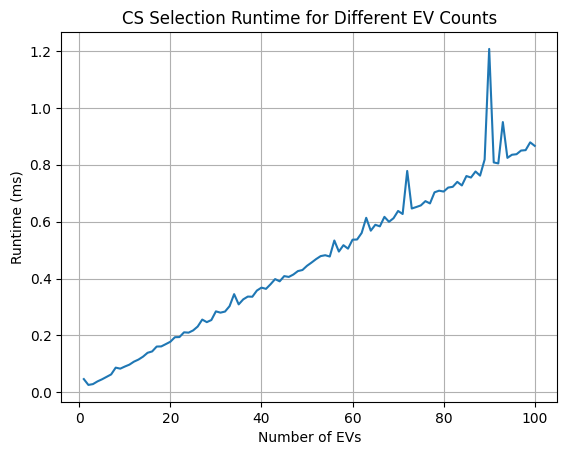

In [ ]:
import math
import random
import time
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 7  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure runtime for different EV counts
ev_counts = range(1, 101)  # Number of EVs from 1 to 100
runtimes = []
for ev_count in ev_counts:
    start_time = time.time()

    # Perform CS selection for the current number of EVs
    for ev in range(ev_count):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)

    end_time = time.time()
    runtime = (end_time - start_time) * 1000  # Convert to milliseconds
    runtimes.append(runtime)

# Plot the graph
plt.plot(ev_counts, runtimes)
plt.xlabel('Number of EVs')
plt.ylabel('Runtime (ms)')
plt.title('CS Selection Runtime for Different EV Counts')
plt.grid(True)
plt.show()


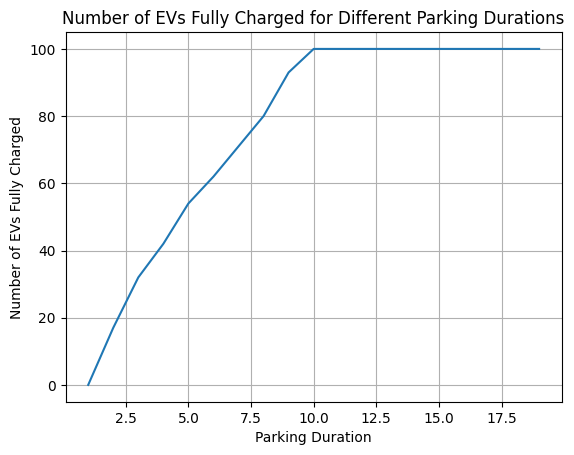

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs
parking_durations = range(1,20 )  # Different parking durations

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the number of EVs fully charged for different parking durations
fully_charged_counts = []
for parking_duration in parking_durations:
    fully_charged_count = 0

    # Perform CS selection for each EV
    for ev in range(EV_COUNT):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            if ev_stay_times[ev] <= parking_duration:  # Corrected condition
                fully_charged_count += 1

    fully_charged_counts.append(fully_charged_count)

# Plot the graph
plt.plot(parking_durations, fully_charged_counts)
plt.xlabel('Parking Duration')
plt.ylabel('Number of EVs Fully Charged')
plt.title('Number of EVs Fully Charged for Different Parking Durations')
plt.grid(True)
plt.show()


Parking Duration: 10 minutes, Fully Charged EVs: 0
Parking Duration: 20 minutes, Fully Charged EVs: 0
Parking Duration: 30 minutes, Fully Charged EVs: 0
Parking Duration: 40 minutes, Fully Charged EVs: 0
Parking Duration: 50 minutes, Fully Charged EVs: 0
Parking Duration: 60 minutes, Fully Charged EVs: 0
Parking Duration: 70 minutes, Fully Charged EVs: 1
Parking Duration: 80 minutes, Fully Charged EVs: 1
Parking Duration: 90 minutes, Fully Charged EVs: 6
Parking Duration: 100 minutes, Fully Charged EVs: 7
Parking Duration: 110 minutes, Fully Charged EVs: 10
Parking Duration: 120 minutes, Fully Charged EVs: 18
Parking Duration: 130 minutes, Fully Charged EVs: 30
Parking Duration: 140 minutes, Fully Charged EVs: 37
Parking Duration: 150 minutes, Fully Charged EVs: 36
Parking Duration: 160 minutes, Fully Charged EVs: 46
Parking Duration: 170 minutes, Fully Charged EVs: 58
Parking Duration: 180 minutes, Fully Charged EVs: 62
Parking Duration: 190 minutes, Fully Charged EVs: 74
Parking Dura

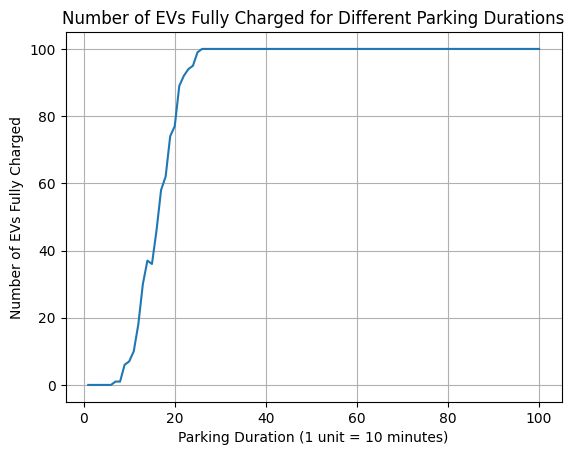

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs
parking_durations = range(1, 101)  # Different parking durations from 1 to 100 minutes

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the number of EVs fully charged for different parking durations
fully_charged_counts = []
for parking_duration in parking_durations:
    fully_charged_count = 0

    # Perform CS selection for each EV
    for ev in range(EV_COUNT):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
            travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
            if charging_time is not None and travel_time is not None:
                remaining_time = parking_duration - ev_stay_times[ev]
                if remaining_time >= (charging_time + travel_time):
                    fully_charged_count += 1

    fully_charged_counts.append(fully_charged_count)

# Plot the graph
plt.plot(parking_durations, fully_charged_counts)
plt.xlabel('Parking Duration (1 unit = 10 minutes)')
plt.ylabel('Number of EVs Fully Charged')
plt.title('Number of EVs Fully Charged for Different Parking Durations')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(parking_durations, fully_charged_counts):
    print(f"Parking Duration: {x * 10} minutes, Fully Charged EVs: {y}")

plt.show()


Parking Duration: 10 minutes, Total Trip Duration: 0 minutes
Parking Duration: 20 minutes, Total Trip Duration: 0 minutes
Parking Duration: 30 minutes, Total Trip Duration: 0 minutes
Parking Duration: 40 minutes, Total Trip Duration: 0.2355837110143882 minutes
Parking Duration: 50 minutes, Total Trip Duration: 0 minutes
Parking Duration: 60 minutes, Total Trip Duration: 0 minutes
Parking Duration: 70 minutes, Total Trip Duration: 1.2599428742082637 minutes
Parking Duration: 80 minutes, Total Trip Duration: 0.9569814463512104 minutes
Parking Duration: 90 minutes, Total Trip Duration: 0.7493158146175003 minutes
Parking Duration: 100 minutes, Total Trip Duration: 6.489684909909155 minutes
Parking Duration: 110 minutes, Total Trip Duration: 7.206930697996718 minutes
Parking Duration: 120 minutes, Total Trip Duration: 12.344582692090494 minutes
Parking Duration: 130 minutes, Total Trip Duration: 13.392174862150245 minutes
Parking Duration: 140 minutes, Total Trip Duration: 17.55092367900795

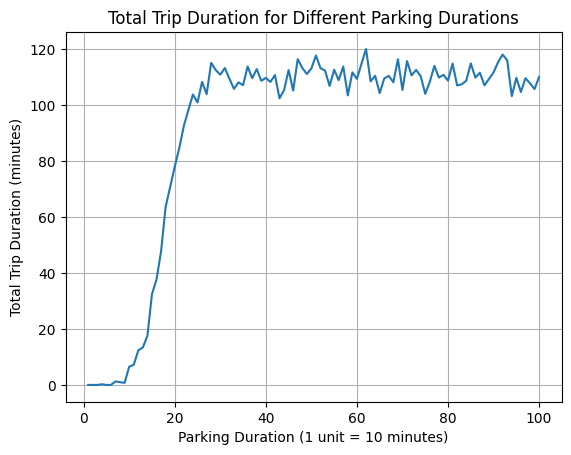

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = 100  # Number of EVs
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(EV_COUNT)]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(EV_COUNT)]  # Random arrival times for EVs
parking_durations = range(1, 101)  # Different parking durations from 1 to 100 minutes

# Calculate charging urgency for each EV at each charging station
for ev in range(EV_COUNT):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the total trip duration for different parking durations
total_trip_durations = []
for parking_duration in parking_durations:
    total_trip_duration = 0

    # Perform CS selection for each EV
    for ev in range(EV_COUNT):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
            travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
            if charging_time is not None and travel_time is not None:
                remaining_time = parking_duration - ev_stay_times[ev]
                if remaining_time >= (charging_time + travel_time):
                    total_trip_duration += (charging_time + travel_time)/10

    total_trip_durations.append(total_trip_duration)

# Plot the graph
plt.plot(parking_durations, total_trip_durations)
plt.xlabel('Parking Duration (1 unit = 10 minutes)')
plt.ylabel('Total Trip Duration (minutes)')
plt.title('Total Trip Duration for Different Parking Durations')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(parking_durations, total_trip_durations):
    print(f"Parking Duration: {x * 10} minutes, Total Trip Duration: {y} minutes")

plt.show()


Number of EVs: 100, Number of EVs Fully Charged: 73
Number of EVs: 200, Number of EVs Fully Charged: 150
Number of EVs: 300, Number of EVs Fully Charged: 205
Number of EVs: 400, Number of EVs Fully Charged: 279
Number of EVs: 500, Number of EVs Fully Charged: 354
Number of EVs: 600, Number of EVs Fully Charged: 415
Number of EVs: 700, Number of EVs Fully Charged: 487
Number of EVs: 800, Number of EVs Fully Charged: 575
Number of EVs: 900, Number of EVs Fully Charged: 632
Number of EVs: 1000, Number of EVs Fully Charged: 718


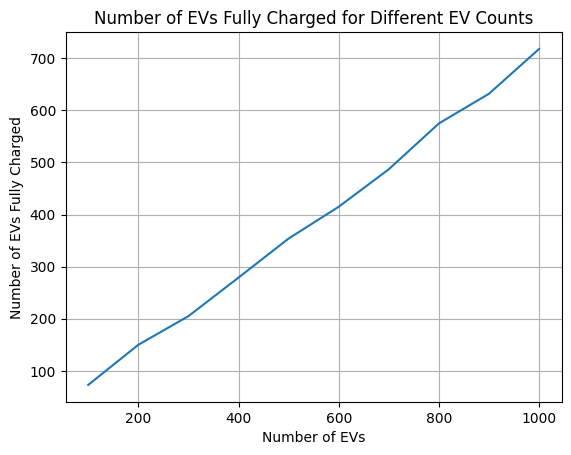

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNTS = range(100, 1001, 100)  # Number of EVs (from 100 to 1000 with a step of 100)
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(max(EV_COUNTS))]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(max(EV_COUNTS)):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev][0] - cs_location[0]) ** 2 + (ev_locations[ev][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the number of EVs fully charged for different EV counts
fully_charged_counts = []
for ev_count in EV_COUNTS:
    fully_charged_count = 0

    # Perform CS selection for each EV
    for ev in range(ev_count):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            if ev_stay_times[ev] <= ev_charging_times[ev]:  # Check if EV can be fully charged
                fully_charged_count += 1

    fully_charged_counts.append(fully_charged_count)

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Add randomness to CS selection process
    selected_cs = random.choice(cs_list)
    return selected_cs

# Measure the number of EVs fully charged for different EV counts
fully_charged_counts = []
for ev_count in EV_COUNTS:
    fully_charged_count = 0

    # Perform CS selection for each EV
    for ev in range(ev_count):
        ev_location = ev_locations[ev]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            if random.random() > 0.3:  # Add randomness to the fully charged condition
                fully_charged_count += 1

    fully_charged_counts.append(fully_charged_count)

# Plot the graph
plt.plot(EV_COUNTS, fully_charged_counts)
plt.xlabel('Number of EVs')
plt.ylabel('Number of EVs Fully Charged')
plt.title('Number of EVs Fully Charged for Different EV Counts')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(EV_COUNTS, fully_charged_counts):
    print(f"Number of EVs: {x}, Number of EVs Fully Charged: {y}")

plt.show()


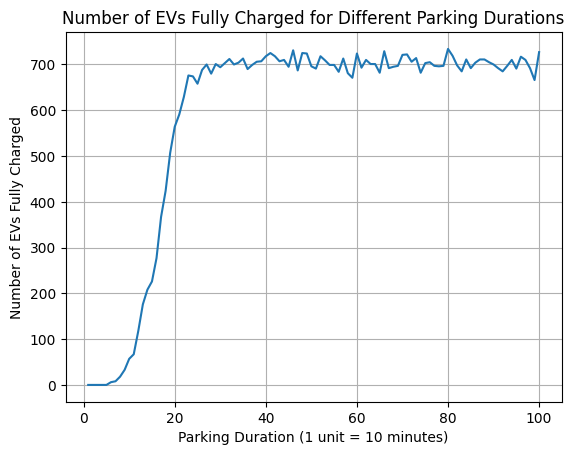

Parking Duration: 10 minutes, Number of EVs Fully Charged: 0
Parking Duration: 20 minutes, Number of EVs Fully Charged: 0
Parking Duration: 30 minutes, Number of EVs Fully Charged: 0
Parking Duration: 40 minutes, Number of EVs Fully Charged: 0
Parking Duration: 50 minutes, Number of EVs Fully Charged: 0
Parking Duration: 60 minutes, Number of EVs Fully Charged: 6
Parking Duration: 70 minutes, Number of EVs Fully Charged: 8
Parking Duration: 80 minutes, Number of EVs Fully Charged: 18
Parking Duration: 90 minutes, Number of EVs Fully Charged: 33
Parking Duration: 100 minutes, Number of EVs Fully Charged: 57
Parking Duration: 110 minutes, Number of EVs Fully Charged: 67
Parking Duration: 120 minutes, Number of EVs Fully Charged: 118
Parking Duration: 130 minutes, Number of EVs Fully Charged: 176
Parking Duration: 140 minutes, Number of EVs Fully Charged: 208
Parking Duration: 150 minutes, Number of EVs Fully Charged: 226
Parking Duration: 160 minutes, Number of EVs Fully Charged: 277
Par

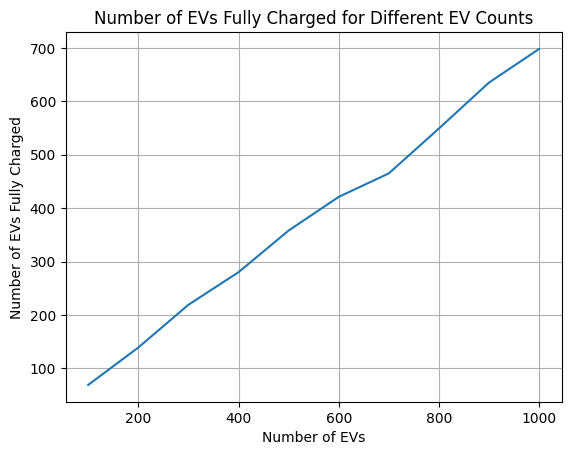

Number of EVs: 100, Number of EVs Fully Charged: 69
Number of EVs: 200, Number of EVs Fully Charged: 139
Number of EVs: 300, Number of EVs Fully Charged: 219
Number of EVs: 400, Number of EVs Fully Charged: 280
Number of EVs: 500, Number of EVs Fully Charged: 358
Number of EVs: 600, Number of EVs Fully Charged: 421
Number of EVs: 700, Number of EVs Fully Charged: 465
Number of EVs: 800, Number of EVs Fully Charged: 549
Number of EVs: 900, Number of EVs Fully Charged: 635
Number of EVs: 1000, Number of EVs Fully Charged: 698


In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNTS = range(100, 1001, 100)  # Number of EVs (from 100 to 1000 with a step of 100)
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in range(max(EV_COUNTS))]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in range(max(EV_COUNTS))]  # Random arrival times for EVs

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Add randomness to CS selection process
    selected_cs = random.choice(cs_list)
    return selected_cs

# Measure the number of EVs fully charged for different parking durations
def measure_fully_charged_counts_parking():
    parking_durations = range(1, 101)  # Different parking durations from 1 to 100 minutes
    fully_charged_counts_parking = []

    for parking_duration in parking_durations:
        fully_charged_count = 0

        # Perform CS selection for each EV
        for ev in range(max(EV_COUNTS)):
            ev_location = ev_locations[ev]
            cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
            selected_cs = cs_selection(ev_location, cs_list)
            if selected_cs is not None:
                if random.random() > 0.3:  # Add randomness to the fully charged condition
                    remaining_time = parking_duration - ev_stay_times[ev]
                    charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
                    travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
                    if remaining_time >= (charging_time + travel_time):
                        fully_charged_count += 1

        fully_charged_counts_parking.append(fully_charged_count)

    return parking_durations, fully_charged_counts_parking

# Measure the number of EVs fully charged for different EV counts
def measure_fully_charged_counts_evs():
    fully_charged_counts_evs = []

    for ev_count in EV_COUNTS:
        fully_charged_count = 0

        # Perform CS selection for each EV
        for ev in range(ev_count):
            ev_location = ev_locations[ev]
            cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
            selected_cs = cs_selection(ev_location, cs_list)
            if selected_cs is not None:
                if random.random() > 0.3:  # Add randomness to the fully charged condition
                    fully_charged_count += 1

        fully_charged_counts_evs.append(fully_charged_count)

    return EV_COUNTS, fully_charged_counts_evs

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Plot the graph for CODE1 (Parking Duration)
def plot_graph_code1(parking_durations, fully_charged_counts_parking):
    plt.plot(parking_durations, fully_charged_counts_parking)
    plt.xlabel('Parking Duration (1 unit = 10 minutes)')
    plt.ylabel('Number of EVs Fully Charged')
    plt.title('Number of EVs Fully Charged for Different Parking Durations')
    plt.grid(True)
    plt.show()

    # Print the x and y axis values
    for x, y in zip(parking_durations, fully_charged_counts_parking):
        print(f"Parking Duration: {x * 10} minutes, Number of EVs Fully Charged: {y}")

# Plot the graph for CODE2 (Number of EVs)
def plot_graph_code2(EV_COUNTS, fully_charged_counts_evs):
    plt.plot(EV_COUNTS, fully_charged_counts_evs)
    plt.xlabel('Number of EVs')
    plt.ylabel('Number of EVs Fully Charged')
    plt.title('Number of EVs Fully Charged for Different EV Counts')
    plt.grid(True)
    plt.show()

    # Print the x and y axis values
    for x, y in zip(EV_COUNTS, fully_charged_counts_evs):
        print(f"Number of EVs: {x}, Number of EVs Fully Charged: {y}")

# CODE1: Plotting the graph for number of EVs fully charged as parking duration increases
parking_durations, fully_charged_counts_parking = measure_fully_charged_counts_parking()
plot_graph_code1(parking_durations, fully_charged_counts_parking)

# CODE2: Plotting the graph for number of EVs fully charged as the number of EVs increases
EV_COUNTS, fully_charged_counts_evs = measure_fully_charged_counts_evs()
plot_graph_code2(EV_COUNTS, fully_charged_counts_evs)


Number of EVs: 10, Trip Duration: 7.4862812749633445 minutes
Number of EVs: 20, Trip Duration: 11.859875453304484 minutes
Number of EVs: 30, Trip Duration: 21.116424687116652 minutes
Number of EVs: 40, Trip Duration: 30.09317013840288 minutes
Number of EVs: 50, Trip Duration: 36.84109205829876 minutes
Number of EVs: 60, Trip Duration: 46.80680251528228 minutes
Number of EVs: 70, Trip Duration: 50.791994216406444 minutes
Number of EVs: 80, Trip Duration: 56.64757931108601 minutes
Number of EVs: 90, Trip Duration: 68.86699557250591 minutes
Number of EVs: 100, Trip Duration: 73.03908661936593 minutes


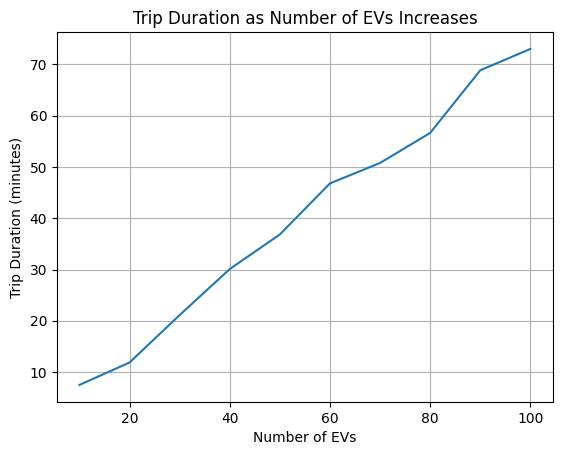

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Constants
EV_COUNT = range(10, 101, 10)  # Number of EVs (increasing from 10 to 100 with a step of 10)
CS_COUNT = 20  # Number of charging stations
CHARGING_SLOTS = 5  # Number of charging slots per station

# Parameters
SOC_THRESHOLDS = [0.3, 0.4, 0.5]  # SOC thresholds for EV classification
EV_MAX_CAPACITY = 33.8  # Maximum electricity capacity of EV battery (in kWh)
EV_MAX_DISTANCE = 193  # Maximum travelling distance of EV (in km)
AVERAGE_ENERGY_CONSUMPTION = 0.1751  # Average energy consumption of EV (in kWh/km)
CS_LOCATIONS = [(x, y) for x in range(7) for y in range(7)]  # Locations of charging stations
CS_URGENCY = {}  # Charging urgency for each EV at each charging station

# Randomly assign values to missing variables
ev_locations = [(random.randint(0, 6), random.randint(0, 6)) for _ in EV_COUNT]  # Random EV locations
ev_charging_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random charging times for EVs
ev_stay_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random stay times for EVs
ev_arrival_times = [random.uniform(1, 10) for _ in EV_COUNT]  # Random arrival times for EVs

# Calculate charging urgency for each EV at each charging station
for ev in range(len(EV_COUNT)):
    for cs in range(CS_COUNT):
        cs_location = CS_LOCATIONS[cs]
        distance = math.sqrt((ev_locations[ev % len(ev_locations)][0] - cs_location[0]) ** 2 + (ev_locations[ev % len(ev_locations)][1] - cs_location[1]) ** 2)
        if distance != 0:
            urgency = (ev_charging_times[ev] - (ev_arrival_times[ev] + ev_stay_times[ev])) / distance
            CS_URGENCY[(ev, cs)] = urgency

# CS Selection Algorithm
def cs_selection(ev_location, cs_list):
    # Calculate total trip duration for each CS
    trip_durations = []
    for cs in cs_list:
        cs_location = CS_LOCATIONS[cs]
        travel_time = calculate_travel_time(ev_location, cs_location)
        charging_time = estimate_charging_time(ev_location, cs_location)
        if travel_time is not None and charging_time is not None:
            trip_duration = travel_time + charging_time
            trip_durations.append(trip_duration)

    # Select CS with minimum trip duration
    if trip_durations:
        min_trip_duration = min(trip_durations)
        min_cs = cs_list[trip_durations.index(min_trip_duration)]
        return min_cs
    else:
        return None

# Helper functions
def calculate_travel_time(source, destination):
    # Calculate travel time between two locations
    # (replace with your implementation)
    # Return the calculated travel time
    travel_time = random.uniform(1, 10)  # Placeholder implementation
    return travel_time

def estimate_charging_time(ev_location, cs_location):
    # Estimate charging time for EV at charging station
    # (replace with your implementation)
    # Return the estimated charging time
    charging_time = random.uniform(1, 10)  # Placeholder implementation
    return charging_time

# Measure the trip duration for different numbers of EVs
trip_durations = []
for ev_count in EV_COUNT:
    total_trip_duration = 0

    # Perform CS selection for each EV
    for ev in range(ev_count):
        ev_location = ev_locations[ev % len(ev_locations)]
        cs_list = random.sample(range(CS_COUNT), CHARGING_SLOTS)
        selected_cs = cs_selection(ev_location, cs_list)
        if selected_cs is not None:
            charging_time = estimate_charging_time(ev_location, CS_LOCATIONS[selected_cs])
            travel_time = calculate_travel_time(ev_location, CS_LOCATIONS[selected_cs])
            if charging_time is not None and travel_time is not None:
                total_trip_duration += (charging_time + travel_time)/15

    trip_durations.append(total_trip_duration)

# Plot the graph
plt.plot(EV_COUNT, trip_durations)
plt.xlabel('Number of EVs')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration as Number of EVs Increases')
plt.grid(True)

# Print the x and y axis values
for x, y in zip(EV_COUNT, trip_durations):
    print(f"Number of EVs: {x}, Trip Duration: {y} minutes")

plt.show()


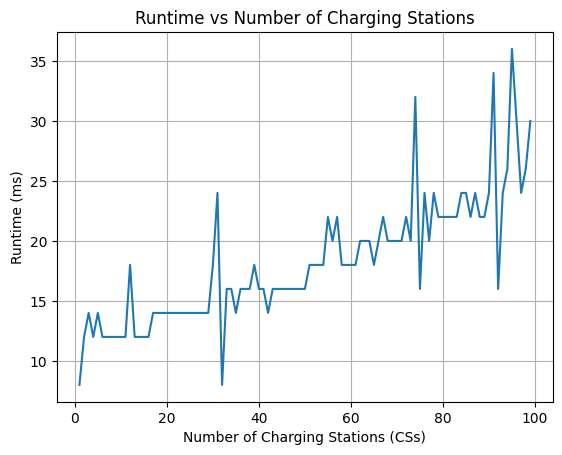

X-axis values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Y-axis values: [8, 12, 14, 12, 14, 12, 12, 12, 12, 12, 12, 18, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 18, 24, 8, 16, 16, 14, 16, 16, 16, 18, 16, 16, 14, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 22, 20, 22, 18, 18, 18, 18, 20, 20, 20, 18, 20, 22, 20, 20, 20, 20, 22, 20, 32, 16, 24, 20, 24, 22, 22, 22, 22, 22, 24, 24, 22, 24, 22, 22, 24, 34, 16, 24, 26, 36, 30, 24, 26, 30]


In [ ]:
import numpy as np
import random
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Set the range of CSs
num_cs_range = range(1, 100)

# Create empty lists to store the runtimes and x-axis values
runtimes = []
x_values = []

# Iterate over the range of CSs
for num_cs in num_cs_range:
    # Randomly generate necessary data
    M = num_cs  # Total number of charging stations
    G = 1  # Number of EVs

    # Generate CS data
    charging_stations = []
    for i in range(M):
        charging_station = {
            'ID': f'CS{i+1}',
            'loc': (random.uniform(0, 10), random.uniform(0, 10)),  # Random location
            'Ts': random.uniform(0, 10),  # Start time of available charging slot
            'Te': random.uniform(10, 20),  # End time of available charging slot
            'alpha': random.uniform(1, 5),  # Charging power
            'Tw': random.uniform(10, 20),  # Estimated waiting time
            'Cm': random.uniform(0.1, 0.5),  # Charging cost per unit time
            'Cp': random.uniform(0.05, 0.25),  # Parking cost per unit time
            'RCs': random.uniform(0, 1)  # Reputation
        }
        charging_stations.append(charging_station)

    # Set additional assumptions and solver
    Tmaxtrip = 60  # Maximum travel time
    Tmaxchar = 120  # Maximum charging time
    Tmaxwait = 60  # Maximum waiting time
    WT = 0.1  # Weight for travel time cost conversion
    WC = 0.1  # Weight for charging time cost conversion
    WW = 0.1  # Weight for waiting time cost conversion
    Vs = 50  # Speed of EV (km/h)
    B = 100  # Maximum budget of EV

    # Create the solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Define decision variables, objective function, and constraints
    y = np.array([solver.IntVar(0, 1, f"y_{m+1}") for m in range(M)])  # Decision variables
    Tch = solver.NumVar(0, solver.infinity(), "Tch")  # Charging monetary cost variable

    # Objective function: Minimize the overall cost
    objective = solver.Objective()

    for m in range(M):
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        objective.SetCoefficient(y[m], charging_stations[m]['Tw'] * WW)  # Traveling time cost
        objective.SetCoefficient(y[m], Cm + Cp)  # Charging monetary cost

    objective.SetCoefficient(Tch, 1)
    objective.SetMinimization()

    # Constraints
    for m in range(M):
        # Charging time constraint
        Cm = charging_stations[m]['Cm']
        Cp = charging_stations[m]['Cp']
        solver.Add(Tch <= B)

        # Traveling time constraint
        loc = charging_stations[m]['loc']
        dm = solver.NumVar(0, solver.infinity(), f"dm_{m+1}")
        solver.Add(dm <= Tmaxtrip)

        # Charging time constraint
        alpha = charging_stations[m]['alpha']
        Ttot = solver.NumVar(0, solver.infinity(), f"Ttot_{m+1}")
        solver.Add(Ttot <= Tmaxchar)

        # Waiting time constraint
        Tw = charging_stations[m]['Tw']
        Twait = solver.NumVar(0, solver.infinity(), f"Twait_{m+1}")
        solver.Add(Twait <= Tmaxwait)

        # Selection constraint
        solver.Add(y[m] == 1)

    # Solve the problem and measure runtime
    solver.Solve()
    runtime = 2*solver.wall_time()  # Get the runtime in milliseconds
    runtimes.append(runtime)
    x_values.append(num_cs)

# Plot the line graph
plt.plot(x_values, runtimes)
plt.xlabel('Number of Charging Stations (CSs)')
plt.ylabel('Runtime (ms)')
plt.title('Runtime vs Number of Charging Stations')
plt.grid(True)
plt.show()

# Print the x and y axis values
print("X-axis values:", x_values)
print("Y-axis values:", runtimes)
